In [1755]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random


In [1756]:
df=pd.read_csv('Loan_Train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [1757]:
df.shape

(614, 13)

In [1758]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [1759]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [1760]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1761]:
def fun1(x):
    if x=='Y':
        return 1
    else:
        return 0
df['Loan_approved']=df['Loan_Status'].apply(fun1)
df.drop('Loan_Status',axis=1,inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_approved
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [1762]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_approved
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_approved,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


In [1763]:
for x in df.columns[1:]:
    print(x,df[x].unique())

Gender ['Male' 'Female' nan]
Married ['No' 'Yes' nan]
Dependents ['0' '1' '2' '3+' nan]
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes' nan]
ApplicantIncome [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  2014  2718  3459  4895
  3316 14999  4200  5042  6950  2698 11757  2330 14866  1538 10000  4860
  6277  2577  9166  2281

In [1764]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_approved'],
      dtype='object')

In [1765]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [1766]:
def fun2(x):
    if(x==1):
        return random.randint(700,800)
    else:
        return random.randint(300,600)

df['Credit_Score']=df['Credit_History'].map(fun2)

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_approved,Credit_Score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,733
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,754
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,772
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,706
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,752


In [1767]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_approved,Credit_Score
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710,-0.004275
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187,-0.091910
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318,-0.030381
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268,-0.000878
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678,0.923358
Loan_approved,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000,0.418815
Credit_Score,-0.004275,-0.091910,-0.030381,-0.000878,0.923358,0.418815,1.000000


In [1768]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [1769]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [1770]:
#Filling missing values of categorical data
df['Gender']=df['Gender'].fillna('Male')
df['Gender'].value_counts()


Male      502
Female    112
Name: Gender, dtype: int64

In [1771]:
df['Married'].value_counts()
df['Married']=df['Married'].fillna('Yes')
df['Married'].value_counts()


Yes    401
No     213
Name: Married, dtype: int64

In [1772]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [1773]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [1774]:
df['Self_Employed'].mode()
df['Self_Employed'].fillna('No',inplace=True)
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [1775]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_approved         0
Credit_Score          0
dtype: int64

In [1776]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [1777]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

In [1778]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_approved         0
Credit_Score          0
dtype: int64

In [1779]:
df['Credit_History'].fillna(df['Credit_History'].mode(),inplace=True)

In [1780]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [1781]:
df.drop(columns=['Credit_History'],inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_approved,Credit_Score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,Urban,1,733
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Rural,0,754
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,1,772
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,1,706
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Urban,1,752


In [1782]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Property_Area         0
Loan_approved         0
Credit_Score          0
dtype: int64

In [1783]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Dependents']

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

In [1784]:
df.dropna(inplace=True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Loan_approved        0
Credit_Score         0
dtype: int64

In [1785]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_approved,Credit_Score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,Urban,1,733
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Rural,0,754
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,1,772
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,1,706
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Urban,1,752


In [1786]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_approved,Credit_Score
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.004710,-0.004275
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,-0.059187,-0.091910
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.033214,-0.031351
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.022549,-0.005611
Loan_approved,-0.004710,-0.059187,-0.033214,-0.022549,1.000000,0.418815
Credit_Score,-0.004275,-0.091910,-0.031351,-0.005611,0.418815,1.000000


c:\Users\faize\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


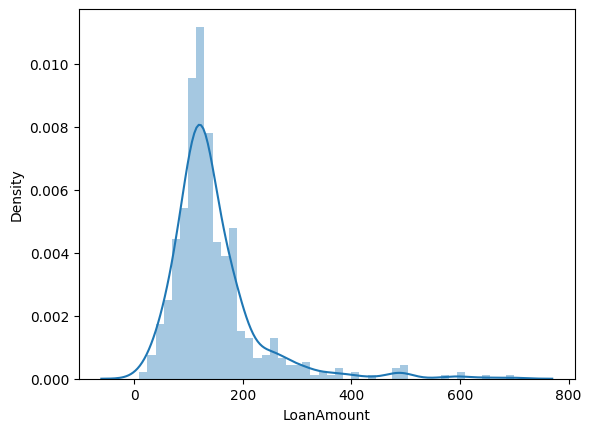

In [1787]:
sns.distplot(df['LoanAmount'])
plt.show()

c:\Users\faize\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


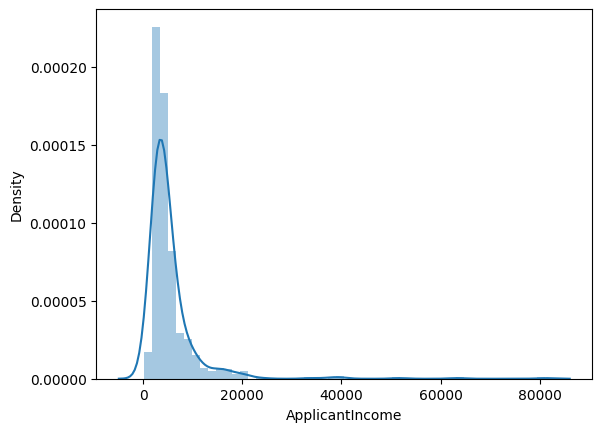

In [1788]:
sns.distplot(df['ApplicantIncome'])
plt.show()


In [1789]:
def conv(x):
    return x*80
df['LoanAmount']=df['LoanAmount'].apply(conv)
df['CoapplicantIncome']=df['CoapplicantIncome'].apply(conv)
df['ApplicantIncome']=df['ApplicantIncome'].apply(conv)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_approved,Credit_Score
0,LP001002,Male,No,0,Graduate,No,467920,0.0,10240.0,360.0,Urban,1,733
1,LP001003,Male,Yes,1,Graduate,No,366640,120640.0,10240.0,360.0,Rural,0,754
2,LP001005,Male,Yes,0,Graduate,Yes,240000,0.0,5280.0,360.0,Urban,1,772
3,LP001006,Male,Yes,0,Not Graduate,No,206640,188640.0,9600.0,360.0,Urban,1,706
4,LP001008,Male,No,0,Graduate,No,480000,0.0,11280.0,360.0,Urban,1,752


In [1790]:
df.shape

(614, 13)

In [1791]:
def fun4(x):
    if(x=='0'):
        return 0
    if(x=='1'):
        return 1
    if(x=='2'):
        return 2
    if(x=='3+'):
        return 3
df['Dependents']=df['Dependents'].apply(fun4)
    


In [1792]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Loan_approved        0
Credit_Score         0
dtype: int64

In [1793]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_approved,Credit_Score
0,LP001002,Male,No,0,Graduate,No,467920,0.0,10240.0,360.0,Urban,1,733
1,LP001003,Male,Yes,1,Graduate,No,366640,120640.0,10240.0,360.0,Rural,0,754
2,LP001005,Male,Yes,0,Graduate,Yes,240000,0.0,5280.0,360.0,Urban,1,772
3,LP001006,Male,Yes,0,Not Graduate,No,206640,188640.0,9600.0,360.0,Urban,1,706
4,LP001008,Male,No,0,Graduate,No,480000,0.0,11280.0,360.0,Urban,1,752


In [1794]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Loan_approved        0
Credit_Score         0
dtype: int64

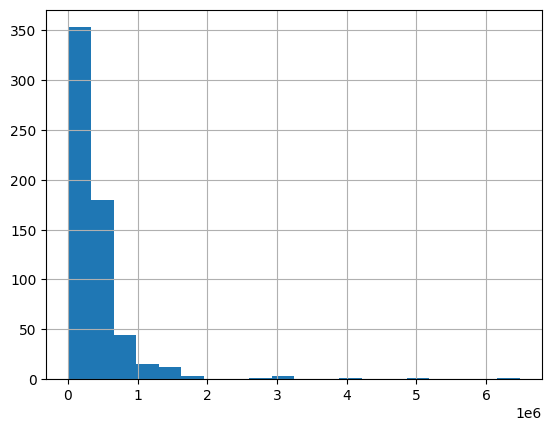

In [1795]:
df['ApplicantIncome'].hist(bins=20)
plt.show()

In [1803]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_approved,Credit_Score
0,LP001002,1,0,0,1,1,467920,0.0,10240.0,360.0,0,1,733
1,LP001003,1,1,1,1,1,366640,120640.0,10240.0,360.0,1,0,754
2,LP001005,1,1,0,1,1,240000,0.0,5280.0,360.0,0,1,772
3,LP001006,1,1,0,0,1,206640,188640.0,9600.0,360.0,0,1,706
4,LP001008,1,0,0,1,1,480000,0.0,11280.0,360.0,0,1,752


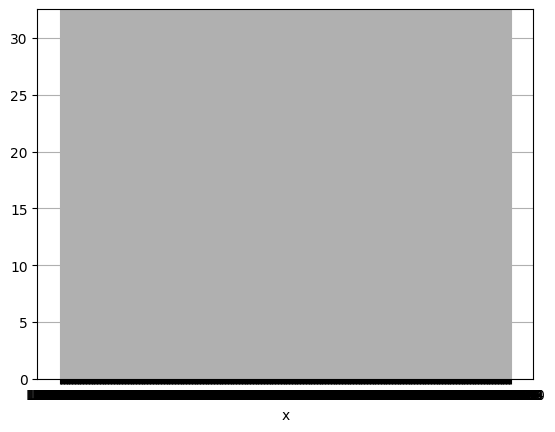

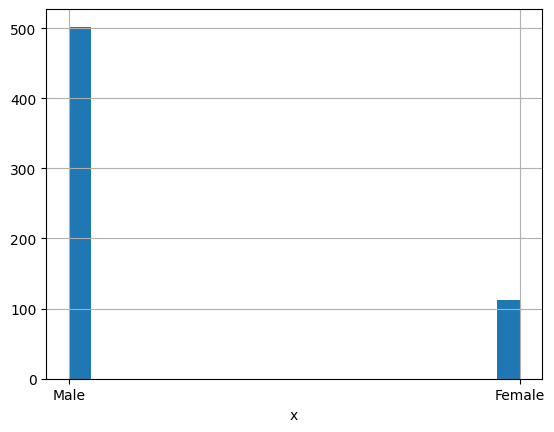

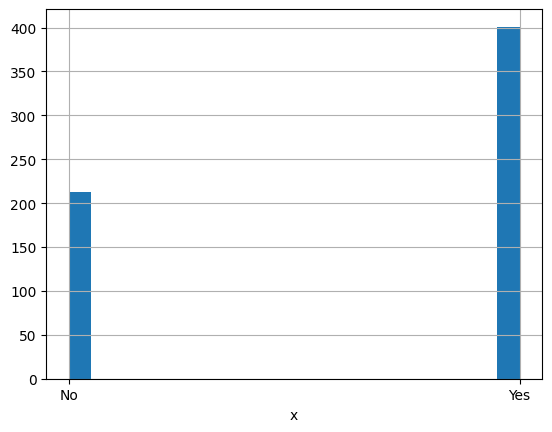

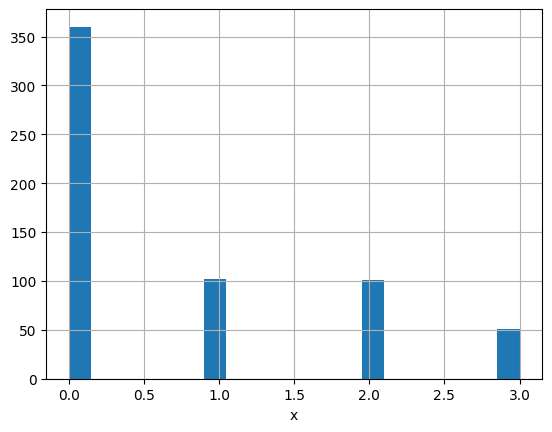

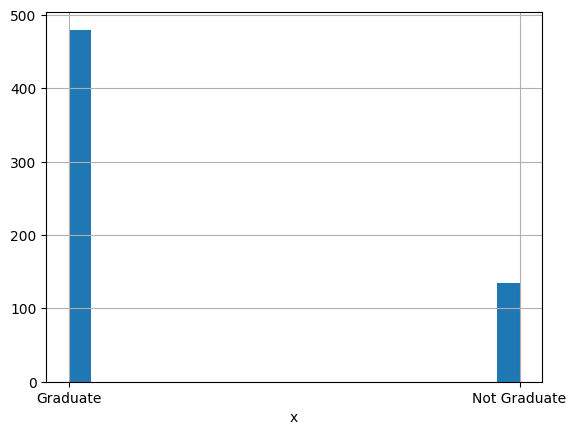

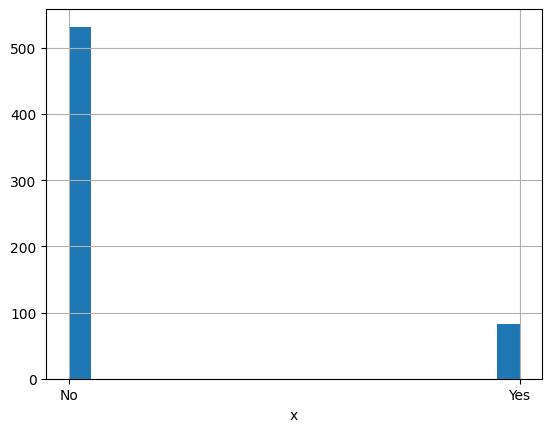

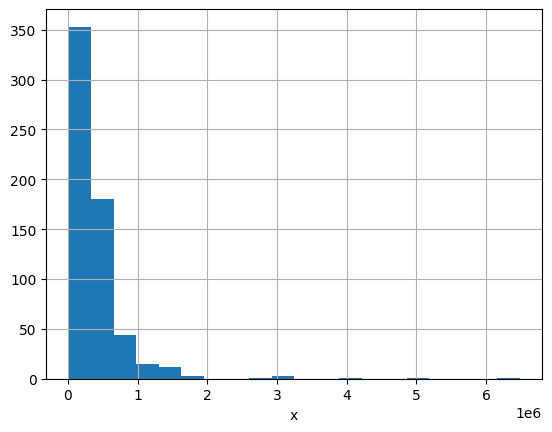

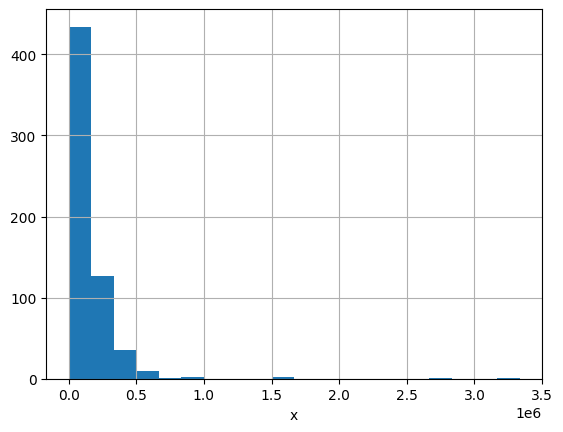

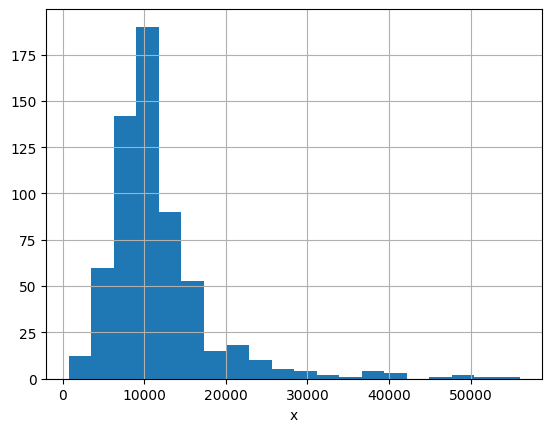

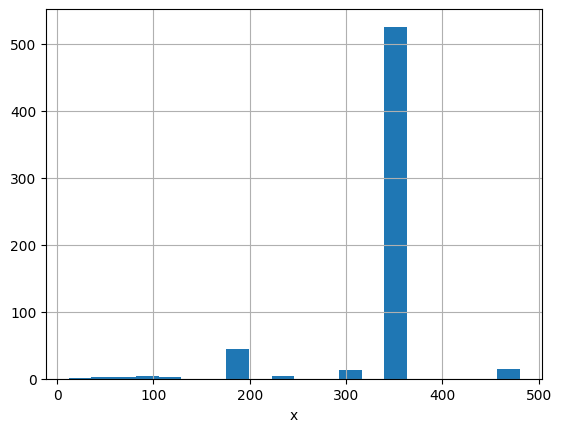

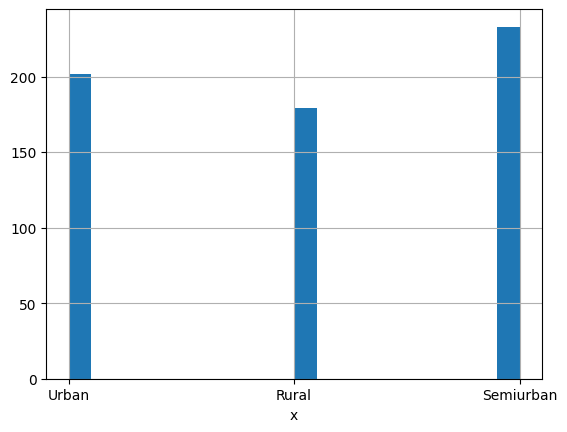

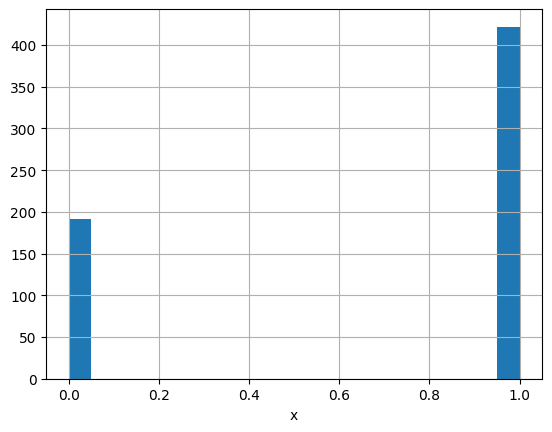

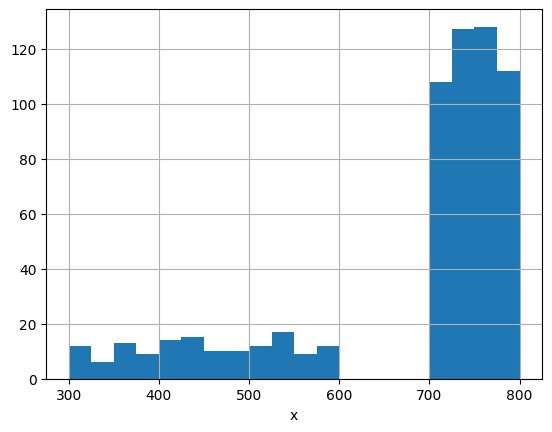

In [1796]:
for x in df.columns:
    df[x].hist(bins=20)
    plt.xlabel('x')
    plt.show()

In [1797]:
#LAbel Encoding

In [1798]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_approved,Credit_Score
0,LP001002,Male,No,0,Graduate,No,467920,0.0,10240.0,360.0,Urban,1,733
1,LP001003,Male,Yes,1,Graduate,No,366640,120640.0,10240.0,360.0,Rural,0,754
2,LP001005,Male,Yes,0,Graduate,Yes,240000,0.0,5280.0,360.0,Urban,1,772
3,LP001006,Male,Yes,0,Not Graduate,No,206640,188640.0,9600.0,360.0,Urban,1,706
4,LP001008,Male,No,0,Graduate,No,480000,0.0,11280.0,360.0,Urban,1,752


In [1799]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [1800]:
def fun5_Gender(x):
    if x=='Male':
        return 1
    if(x=='Female'):
        return 0
def fun6_Married(x):
    if x=='Yes':
        return 1
    else:
        return 0
def fun7_education(x):
    if x=='Graduate':
        return 1
    else:
        return 0
def fun8_self_employed(x):
    if x=='Self_employed':
        return 0
    else:
        return 1
def fun9_prop(x):
    if x=='Urban':
        return 0
    if x=='Rural':
        return 1
    if x=='Semiurban':
        return 2
    
df['Gender']=df['Gender'].apply(fun5_Gender)
df['Married']=df['Married'].apply(fun6_Married)
df['Education']=df['Education'].apply(fun7_education)
df['Self_Employed']=df['Self_Employed'].apply(fun8_self_employed)
df['Property_Area']=df['Property_Area'].apply(fun9_prop)


In [1801]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_approved,Credit_Score
0,LP001002,1,0,0,1,1,467920,0.0,10240.0,360.0,0,1,733
1,LP001003,1,1,1,1,1,366640,120640.0,10240.0,360.0,1,0,754
2,LP001005,1,1,0,1,1,240000,0.0,5280.0,360.0,0,1,772
3,LP001006,1,1,0,0,1,206640,188640.0,9600.0,360.0,0,1,706
4,LP001008,1,0,0,1,1,480000,0.0,11280.0,360.0,0,1,752


In [1802]:
df.to_csv('Loan_approval_clean.csv')